In [24]:
import os
import keras
from keras import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib as mpl
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import UpSampling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from skimage.io import imsave, imread
import matplotlib.pyplot as plt
import numpy as np
import cv2
from scipy import ndimage
from scipy.misc import imresize
from keras.layers.convolutional import Deconv2D as Conv2DTranspose
from keras.models import Model
from keras.layers import Add
from keras.callbacks import ModelCheckpoint,TensorBoard
from keras.optimizers import Adam
from keras.models import Sequential

np.random.seed(1337)

In [3]:
resize_h=256
resize_w=256

def load_data():
    total=len(os.listdir('melanoma/'))+len(os.listdir('others/'))
    print(total)
    imgs=[]
    imgs_mask=[]
    i = 0
    images = os.listdir('melanoma/')
    for image_name in images:
        image_mask_name = image_name.split('.')[0]
        image_mask_name = image_mask_name+"_segmentation.png"
        img = ndimage.imread('melanoma/'+image_name,mode = 'L')
        img = cv2.resize(img, (resize_h, resize_w))
        img_mask = ndimage.imread('gt/'+image_mask_name,mode = 'L')
        img_mask = imresize(img_mask,(resize_h,resize_w))
        ret2,th2 = cv2.threshold(img_mask,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

        img = img_to_array(img)
        img_mask=img_to_array(th2)
        imgs.append(img)
        imgs_mask.append(img_mask)
        print('Done: {0}/{1} images'.format(i, total))
        i += 1
    images = os.listdir('others/')
    for image_name in images:
        image_mask_name = image_name.split('.')[0] 
        image_mask_name = image_mask_name+"_segmentation.png"
        img = ndimage.imread('others/'+image_name,mode = 'L')
        img = cv2.resize(img, (resize_h, resize_w))
        img_mask = ndimage.imread('gt/'+image_mask_name,mode = 'L')
        img_mask=cv2.resize(img_mask,(resize_h,resize_w))
        ret2,th2 = cv2.threshold(img_mask,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        img = img_to_array(img)
        
        img_mask=img_to_array(th2)
        imgs.append(img)
        imgs_mask.append(img_mask)

        print('Done: {0}/{1} images'.format(i, total))
        i += 1
    imgs = np.array(imgs, dtype="float")
    imgs_mask = np.array(imgs_mask,dtype="float")
    return imgs, imgs_mask

X1, Y = load_data()

2000
Done: 0/2000 images
Done: 1/2000 images
Done: 2/2000 images
Done: 3/2000 images
Done: 4/2000 images
Done: 5/2000 images
Done: 6/2000 images
Done: 7/2000 images
Done: 8/2000 images
Done: 9/2000 images
Done: 10/2000 images
Done: 11/2000 images
Done: 12/2000 images
Done: 13/2000 images
Done: 14/2000 images
Done: 15/2000 images
Done: 16/2000 images
Done: 17/2000 images
Done: 18/2000 images
Done: 19/2000 images
Done: 20/2000 images
Done: 21/2000 images
Done: 22/2000 images
Done: 23/2000 images
Done: 24/2000 images
Done: 25/2000 images
Done: 26/2000 images
Done: 27/2000 images
Done: 28/2000 images
Done: 29/2000 images
Done: 30/2000 images
Done: 31/2000 images
Done: 32/2000 images
Done: 33/2000 images
Done: 34/2000 images
Done: 35/2000 images
Done: 36/2000 images
Done: 37/2000 images
Done: 38/2000 images
Done: 39/2000 images
Done: 40/2000 images
Done: 41/2000 images
Done: 42/2000 images
Done: 43/2000 images
Done: 44/2000 images
Done: 45/2000 images
Done: 46/2000 images
Done: 47/2000 imag

Done: 380/2000 images
Done: 381/2000 images
Done: 382/2000 images
Done: 383/2000 images
Done: 384/2000 images
Done: 385/2000 images
Done: 386/2000 images
Done: 387/2000 images
Done: 388/2000 images
Done: 389/2000 images
Done: 390/2000 images
Done: 391/2000 images
Done: 392/2000 images
Done: 393/2000 images
Done: 394/2000 images
Done: 395/2000 images
Done: 396/2000 images
Done: 397/2000 images
Done: 398/2000 images
Done: 399/2000 images
Done: 400/2000 images
Done: 401/2000 images
Done: 402/2000 images
Done: 403/2000 images
Done: 404/2000 images
Done: 405/2000 images
Done: 406/2000 images
Done: 407/2000 images
Done: 408/2000 images
Done: 409/2000 images
Done: 410/2000 images
Done: 411/2000 images
Done: 412/2000 images
Done: 413/2000 images
Done: 414/2000 images
Done: 415/2000 images
Done: 416/2000 images
Done: 417/2000 images
Done: 418/2000 images
Done: 419/2000 images
Done: 420/2000 images
Done: 421/2000 images
Done: 422/2000 images
Done: 423/2000 images
Done: 424/2000 images
Done: 425/

Done: 753/2000 images
Done: 754/2000 images
Done: 755/2000 images
Done: 756/2000 images
Done: 757/2000 images
Done: 758/2000 images
Done: 759/2000 images
Done: 760/2000 images
Done: 761/2000 images
Done: 762/2000 images
Done: 763/2000 images
Done: 764/2000 images
Done: 765/2000 images
Done: 766/2000 images
Done: 767/2000 images
Done: 768/2000 images
Done: 769/2000 images
Done: 770/2000 images
Done: 771/2000 images
Done: 772/2000 images
Done: 773/2000 images
Done: 774/2000 images
Done: 775/2000 images
Done: 776/2000 images
Done: 777/2000 images
Done: 778/2000 images
Done: 779/2000 images
Done: 780/2000 images
Done: 781/2000 images
Done: 782/2000 images
Done: 783/2000 images
Done: 784/2000 images
Done: 785/2000 images
Done: 786/2000 images
Done: 787/2000 images
Done: 788/2000 images
Done: 789/2000 images
Done: 790/2000 images
Done: 791/2000 images
Done: 792/2000 images
Done: 793/2000 images
Done: 794/2000 images
Done: 795/2000 images
Done: 796/2000 images
Done: 797/2000 images
Done: 798/

Done: 1126/2000 images
Done: 1127/2000 images
Done: 1128/2000 images
Done: 1129/2000 images
Done: 1130/2000 images
Done: 1131/2000 images
Done: 1132/2000 images
Done: 1133/2000 images
Done: 1134/2000 images
Done: 1135/2000 images
Done: 1136/2000 images
Done: 1137/2000 images
Done: 1138/2000 images
Done: 1139/2000 images
Done: 1140/2000 images
Done: 1141/2000 images
Done: 1142/2000 images
Done: 1143/2000 images
Done: 1144/2000 images
Done: 1145/2000 images
Done: 1146/2000 images
Done: 1147/2000 images
Done: 1148/2000 images
Done: 1149/2000 images
Done: 1150/2000 images
Done: 1151/2000 images
Done: 1152/2000 images
Done: 1153/2000 images
Done: 1154/2000 images
Done: 1155/2000 images
Done: 1156/2000 images
Done: 1157/2000 images
Done: 1158/2000 images
Done: 1159/2000 images
Done: 1160/2000 images
Done: 1161/2000 images
Done: 1162/2000 images
Done: 1163/2000 images
Done: 1164/2000 images
Done: 1165/2000 images
Done: 1166/2000 images
Done: 1167/2000 images
Done: 1168/2000 images
Done: 1169/

Done: 1483/2000 images
Done: 1484/2000 images
Done: 1485/2000 images
Done: 1486/2000 images
Done: 1487/2000 images
Done: 1488/2000 images
Done: 1489/2000 images
Done: 1490/2000 images
Done: 1491/2000 images
Done: 1492/2000 images
Done: 1493/2000 images
Done: 1494/2000 images
Done: 1495/2000 images
Done: 1496/2000 images
Done: 1497/2000 images
Done: 1498/2000 images
Done: 1499/2000 images
Done: 1500/2000 images
Done: 1501/2000 images
Done: 1502/2000 images
Done: 1503/2000 images
Done: 1504/2000 images
Done: 1505/2000 images
Done: 1506/2000 images
Done: 1507/2000 images
Done: 1508/2000 images
Done: 1509/2000 images
Done: 1510/2000 images
Done: 1511/2000 images
Done: 1512/2000 images
Done: 1513/2000 images
Done: 1514/2000 images
Done: 1515/2000 images
Done: 1516/2000 images
Done: 1517/2000 images
Done: 1518/2000 images
Done: 1519/2000 images
Done: 1520/2000 images
Done: 1521/2000 images
Done: 1522/2000 images
Done: 1523/2000 images
Done: 1524/2000 images
Done: 1525/2000 images
Done: 1526/

Done: 1840/2000 images
Done: 1841/2000 images
Done: 1842/2000 images
Done: 1843/2000 images
Done: 1844/2000 images
Done: 1845/2000 images
Done: 1846/2000 images
Done: 1847/2000 images
Done: 1848/2000 images
Done: 1849/2000 images
Done: 1850/2000 images
Done: 1851/2000 images
Done: 1852/2000 images
Done: 1853/2000 images
Done: 1854/2000 images
Done: 1855/2000 images
Done: 1856/2000 images
Done: 1857/2000 images
Done: 1858/2000 images
Done: 1859/2000 images
Done: 1860/2000 images
Done: 1861/2000 images
Done: 1862/2000 images
Done: 1863/2000 images
Done: 1864/2000 images
Done: 1865/2000 images
Done: 1866/2000 images
Done: 1867/2000 images
Done: 1868/2000 images
Done: 1869/2000 images
Done: 1870/2000 images
Done: 1871/2000 images
Done: 1872/2000 images
Done: 1873/2000 images
Done: 1874/2000 images
Done: 1875/2000 images
Done: 1876/2000 images
Done: 1877/2000 images
Done: 1878/2000 images
Done: 1879/2000 images
Done: 1880/2000 images
Done: 1881/2000 images
Done: 1882/2000 images
Done: 1883/

In [4]:
np.save( 'imgs_train.npy', X1)
np.save('imgs_mask_train.npy', Y)

In [26]:
X1 = np.load('../imgs_train.npy')
Y = np.load('../imgs_mask_train.npy')

In [27]:
Y1 = Y/255.

In [28]:
Y.shape

(2000, 256, 256, 1)

In [29]:
X = X1/255.

In [30]:
Y.shape

(2000, 256, 256, 1)

In [31]:
(trainX, testX, trainY, testY) = train_test_split(X,Y1, test_size=0.20, random_state=42)

In [32]:
np.unique(trainY)

array([ 0.,  1.])

In [33]:
smooth = 1.
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def dice_coef_loss(y_true, y_pred):
    return -K.log(dice_coef(y_true, y_pred))

In [34]:
def get_unet():
    inputs = Input((None, None, 1))
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)
    
    up6 = Add()([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4])
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

    up7 = Add()([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3])
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

    up8 = Add()([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2])
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

    up9 = Add()([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1])
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    model = Model(inputs=[inputs], outputs=[conv10])
  
    model.compile(optimizer=Adam(lr=1e-5), loss='binary_crossentropy', metrics=[dice_coef,'accuracy'])

    return model

In [35]:
model = get_unet()

In [36]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None, None, 1 0                                            
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, None, None, 3 320         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, None, None, 3 9248        conv2d_20[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_5 (MaxPooling2D)  (None, None, None, 3 0           conv2d_21[0][0]                  
__________________________________________________________________________________________________
conv2d_22 

In [37]:
model_checkpoint1 = ModelCheckpoint('./models/U_net_1E_16B.hdf5',monitor = 'loss', verbose = 1,save_best_only=True)

In [35]:
classifier = model.fit(trainX,trainY, batch_size = 32, epochs = 50, verbose = True, validation_data = (testX, testY),callbacks=[TensorBoard(log_dir='/tmp/gated_cnn_autoencoder', histogram_freq=0,write_graph=True),model_checkpoint1])

Train on 1600 samples, validate on 400 samples
Epoch 1/50
1568/1600 [============================>.] - ETA: 18s - loss: 0.6870 - dice_coef: 0.2766 - acc: 0.8007
Epoch 00001: loss improved from inf to 0.68682, saving model to ./models/U_net_1E_16B.hdf5
1600/1600 [==============================] - 1004s 628ms/step - loss: 0.6868 - dice_coef: 0.2762 - acc: 0.8012 - val_loss: 0.6802 - val_dice_coef: 0.2846 - val_acc: 0.7952
Epoch 2/50
1568/1600 [============================>.] - ETA: 18s - loss: 0.6670 - dice_coef: 0.2750 - acc: 0.8068
Epoch 00002: loss improved from 0.68682 to 0.66652, saving model to ./models/U_net_1E_16B.hdf5
1600/1600 [==============================] - 997s 623ms/step - loss: 0.6665 - dice_coef: 0.2745 - acc: 0.8073 - val_loss: 0.6462 - val_dice_coef: 0.2815 - val_acc: 0.7984
Epoch 3/50
1568/1600 [============================>.] - ETA: 18s - loss: 0.5596 - dice_coef: 0.2348 - acc: 0.8075
Epoch 00003: loss improved from 0.66652 to 0.55808, saving model to ./models/U_net

Epoch 23/50
1568/1600 [============================>.] - ETA: 18s - loss: 0.2218 - dice_coef: 0.6831 - acc: 0.9230
Epoch 00023: loss did not improve
1600/1600 [==============================] - 1008s 630ms/step - loss: 0.2210 - dice_coef: 0.6823 - acc: 0.9233 - val_loss: 0.2222 - val_dice_coef: 0.6793 - val_acc: 0.9234
Epoch 24/50
1568/1600 [============================>.] - ETA: 18s - loss: 0.2064 - dice_coef: 0.7016 - acc: 0.9288
Epoch 00024: loss improved from 0.21798 to 0.20585, saving model to ./models/U_net_1E_16B.hdf5
1600/1600 [==============================] - 998s 623ms/step - loss: 0.2059 - dice_coef: 0.7022 - acc: 0.9290 - val_loss: 0.2136 - val_dice_coef: 0.7051 - val_acc: 0.9253
Epoch 25/50
1568/1600 [============================>.] - ETA: 18s - loss: 0.2011 - dice_coef: 0.7109 - acc: 0.9301
Epoch 00025: loss improved from 0.20585 to 0.20142, saving model to ./models/U_net_1E_16B.hdf5
1600/1600 [==============================] - 996s 623ms/step - loss: 0.2014 - dice_coef:

Epoch 47/50
1568/1600 [============================>.] - ETA: 18s - loss: 0.1709 - dice_coef: 0.7448 - acc: 0.9376
Epoch 00047: loss did not improve
1600/1600 [==============================] - 997s 623ms/step - loss: 0.1715 - dice_coef: 0.7446 - acc: 0.9373 - val_loss: 0.1841 - val_dice_coef: 0.7363 - val_acc: 0.9335
Epoch 48/50
1568/1600 [============================>.] - ETA: 18s - loss: 0.1718 - dice_coef: 0.7475 - acc: 0.9373
Epoch 00048: loss did not improve
1600/1600 [==============================] - 997s 623ms/step - loss: 0.1728 - dice_coef: 0.7474 - acc: 0.9368 - val_loss: 0.1833 - val_dice_coef: 0.7309 - val_acc: 0.9325
Epoch 49/50
1568/1600 [============================>.] - ETA: 18s - loss: 0.1750 - dice_coef: 0.7433 - acc: 0.9362
Epoch 00049: loss did not improve
1600/1600 [==============================] - 1018s 636ms/step - loss: 0.1749 - dice_coef: 0.7425 - acc: 0.9364 - val_loss: 0.1864 - val_dice_coef: 0.7347 - val_acc: 0.9310
Epoch 50/50
1568/1600 [================

In [39]:
pred = model.predict(testX,verbose="True")

In [41]:
out_image = pred[0] 
print(out_image.shape)
image = out_image[0]
image[image > 0.5] = 255.
image[image <= 0.5] = 0

(256, 256, 1)


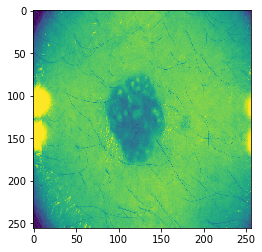

In [42]:
plt.imshow(testX[0,:,:,0])

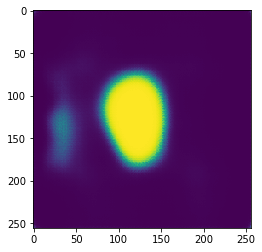

In [43]:
plt.imshow(pred[0,:,:,0])